# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import api_keys

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record_count = 1
set_count = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for i, city in enumerate(cities):  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
       set_count += 1
       record_count = 0
             
    # Create endpoint URL with each city
    #city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record_count} | {city}")
        #print(f"{url}&q={city}")
        
        # Increase counter by one 
        record_count= record_count + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | bathsheba
Processing Record 1 | bathsheba
Processing Record 2 of Set 1 | ribeira grande
Processing Record 2 | ribeira grande
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | portobelo
Processing Record 3 | portobelo
Processing Record 4 of Set 1 | rikitea
Processing Record 4 | rikitea
Processing Record 5 of Set 1 | mataura
Processing Record 5 | mataura
Processing Record 6 of Set 1 | mar del plata
Processing Record 6 | mar del plata
Processing Record 7 of Set 1 | yellowknife
Processing Record 7 | yellowknife
Processing Record 8 of Set 1 | hermanus
Processing Record 8 | hermanus
Processing Record 9 of Set 1 | lebu
Processing Record 9 | lebu
Processing Record 10 of Set 1 | narsaq
Processing Record 10 | narsaq
Processing Record 11 of Set 1 | kidal
Processing Record 11 | kidal
Processing Record 12 of Set 1 | port alfred
Processing Record 12 | port alfre

Processing Record 7 | port-gentil
Processing Record 8 of Set 3 | upernavik
Processing Record 8 | upernavik
Processing Record 9 of Set 3 | juneau
Processing Record 9 | juneau
Processing Record 10 of Set 3 | cabo san lucas
Processing Record 10 | cabo san lucas
Processing Record 11 of Set 3 | luderitz
Processing Record 11 | luderitz
Processing Record 12 of Set 3 | tasiilaq
Processing Record 12 | tasiilaq
Processing Record 13 of Set 3 | chuy
Processing Record 13 | chuy
Processing Record 14 of Set 3 | leshukonskoye
Processing Record 14 | leshukonskoye
Processing Record 15 of Set 3 | dikson
Processing Record 15 | dikson
Processing Record 16 of Set 3 | lompoc
Processing Record 16 | lompoc
Processing Record 17 of Set 3 | kapaa
Processing Record 17 | kapaa
Processing Record 18 of Set 3 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 3 | dickinson
Processing Record 18 | dickinson
Processing Record 19 of Set 3 | chifeng
Processing Record 19 | chifeng
Processing Record 20 of 

Processing Record 20 | aklavik
Processing Record 21 of Set 5 | nazca
Processing Record 21 | nazca
Processing Record 22 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 22 of Set 5 | flinders
Processing Record 22 | flinders
Processing Record 23 of Set 5 | barawe
City not found. Skipping...
Processing Record 23 of Set 5 | toora-khem
Processing Record 23 | toora-khem
Processing Record 24 of Set 5 | jiddah
City not found. Skipping...
Processing Record 24 of Set 5 | erzin
Processing Record 24 | erzin
Processing Record 25 of Set 5 | milkovo
Processing Record 25 | milkovo
Processing Record 26 of Set 5 | te anau
Processing Record 26 | te anau
Processing Record 27 of Set 5 | rosetta
Processing Record 27 | rosetta
Processing Record 28 of Set 5 | korla
City not found. Skipping...
Processing Record 28 of Set 5 | buala
Processing Record 28 | buala
Processing Record 29 of Set 5 | ratnapura
Processing Record 29 | ratnapura
Processing Record 30 of Set 5 | pahrump
Processing Record 

Processing Record 37 of Set 7 | geraldton
Processing Record 37 | geraldton
Processing Record 38 of Set 7 | kavaratti
Processing Record 38 | kavaratti
Processing Record 39 of Set 7 | shamgarh
Processing Record 39 | shamgarh
Processing Record 40 of Set 7 | coxim
Processing Record 40 | coxim
Processing Record 41 of Set 7 | doha
Processing Record 41 | doha
Processing Record 42 of Set 7 | georgetown
Processing Record 42 | georgetown
Processing Record 43 of Set 7 | tiksi
Processing Record 43 | tiksi
Processing Record 44 of Set 7 | puerto el triunfo
Processing Record 44 | puerto el triunfo
Processing Record 45 of Set 7 | tual
Processing Record 45 | tual
Processing Record 46 of Set 7 | san cristobal
Processing Record 46 | san cristobal
Processing Record 47 of Set 7 | acara
City not found. Skipping...
Processing Record 47 of Set 7 | melilla
Processing Record 47 | melilla
Processing Record 48 of Set 7 | quelimane
Processing Record 48 | quelimane
Processing Record 0 of Set 8 | prince rupert
Proce

Processing Record 1 of Set 10 | hay river
Processing Record 1 | hay river
Processing Record 2 of Set 10 | manokwari
Processing Record 2 | manokwari
Processing Record 3 of Set 10 | aquin
Processing Record 3 | aquin
Processing Record 4 of Set 10 | umm kaddadah
Processing Record 4 | umm kaddadah
Processing Record 5 of Set 10 | coffeyville
Processing Record 5 | coffeyville
Processing Record 6 of Set 10 | safford
Processing Record 6 | safford
Processing Record 7 of Set 10 | mangalcal
City not found. Skipping...
Processing Record 7 of Set 10 | pangody
Processing Record 7 | pangody
Processing Record 8 of Set 10 | naze
Processing Record 8 | naze
Processing Record 9 of Set 10 | sambava
Processing Record 9 | sambava
Processing Record 10 of Set 10 | itoman
Processing Record 10 | itoman
Processing Record 11 of Set 10 | alekseyevka
Processing Record 11 | alekseyevka
Processing Record 12 of Set 10 | odweyne
City not found. Skipping...
Processing Record 12 of Set 10 | lagoa
Processing Record 12 | lag

Processing Record 11 of Set 12 | goderich
Processing Record 11 | goderich
Processing Record 12 of Set 12 | kushmurun
City not found. Skipping...
Processing Record 12 of Set 12 | murgab
Processing Record 12 | murgab
Processing Record 13 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 13 of Set 12 | nijar
Processing Record 13 | nijar
Processing Record 14 of Set 12 | villaviciosa
Processing Record 14 | villaviciosa
Processing Record 15 of Set 12 | roald
Processing Record 15 | roald
Processing Record 16 of Set 12 | ekhabi
Processing Record 16 | ekhabi
Processing Record 17 of Set 12 | akdagmadeni
Processing Record 17 | akdagmadeni
Processing Record 18 of Set 12 | pishin
Processing Record 18 | pishin
Processing Record 19 of Set 12 | camacha
Processing Record 19 | camacha
Processing Record 20 of Set 12 | luganville
Processing Record 20 | luganville
Processing Record 21 of Set 12 | cuamba
Processing Record 21 | cuamba
Processing Record 22 of Set 12 | changji
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

#Save Df to CSV
weather_data.to_csv('weather_data.csv')

# Display count of weather data values 
weather_data.count()


City          523
Cloudiness    523
Country       523
Date          523
Humidity      523
Lat           523
Lng           523
Max Temp      523
Wind Speed    523
dtype: int64

In [11]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bathsheba,20,BB,1569371936,83,13.22,-59.52,82.40,13.87
1,Ribeira Grande,0,PT,1569372124,66,38.52,-28.70,70.51,10.65
2,Portobelo,40,PA,1569372125,94,9.55,-79.65,81.00,2.24
3,Rikitea,76,PF,1569371896,65,-23.12,-134.97,71.05,4.41
4,Mataura,100,NZ,1569372128,78,-46.19,168.86,42.01,7.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

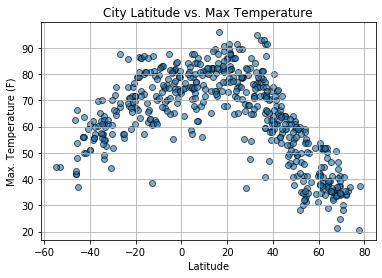

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], edgecolor='black', linewidths=1, marker="o", alpha= .6, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

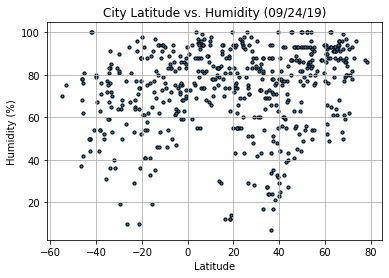

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], edgecolor='black', linewidths=1, marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

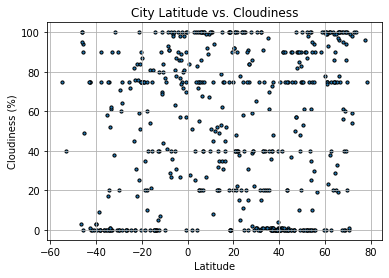

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], edgecolor='black', linewidths=1, marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

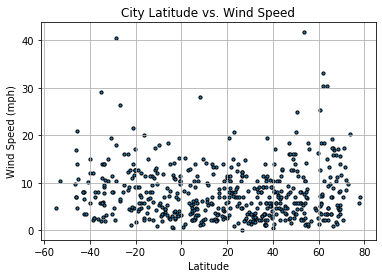

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], edgecolor='black', linewidths=1, marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()